# Working with LIGO Data

LIGO - Laser Interferometer Gravitational-Wave Observatory

## In the News

- [Oct. 16, 2017 - NASA Missions Catch First Light from a Gravitational-Wave Event](https://www.nasa.gov/press-release/nasa-missions-catch-first-light-from-a-gravitational-wave-event)

## Reference

- [What is LIGO?](https://www.ligo.caltech.edu/page/what-is-ligo)
- [LIGO Tutorials](https://losc.ligo.org/tutorials/)

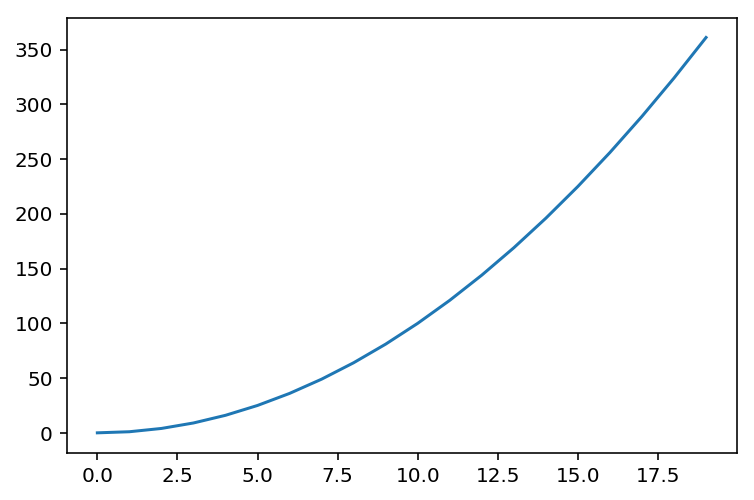

In [1]:
# verify software installation
# import packages and plot a parabola
# https://losc.ligo.org/tutorial00/

import numpy as np
import matplotlib.pyplot as plt
import h5py
vector=np.arange(20)
plt.plot(vector**2)
plt.show()

In [2]:
# read data for neutron star merger event GW170817
# https://dcc.ligo.org/P1700349/public
# H1, 4K samples/sec, 2048 sec of data, HDF5 file type, Version 1,
#   CLN (H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5, 55.2 MB)

fileName = 'H-H1_LOSC_CLN_4_V1-1187007040-2048.hdf5'
dataFile = h5py.File(fileName, 'r')

In [3]:
for key in dataFile.keys():
    print(key) 

meta
quality
strain


In [4]:
# extract strain data
strain = dataFile['strain']['Strain'].value
ts = dataFile['strain']['Strain'].attrs['Xspacing']

In [5]:
# display metadata
metaKeys = dataFile['meta'].keys()
meta = dataFile['meta']
for key in metaKeys:
    print(key, meta[key].value)

Description b'Strain data time series from LIGO'
DescriptionURL b'http://losc.ligo.org/'
Detector b'H1'
Duration 2048
GPSstart 1187007040
Observatory b'H'
Type b'StrainTimeSeries'
UTCstart b'2017-08-17T12:10:22'


In [6]:
# Create a time vector
gpsStart = meta['GPSstart'].value
duration = meta['Duration'].value
gpsEnd   = gpsStart + duration

time = np.arange(gpsStart, gpsEnd, ts)

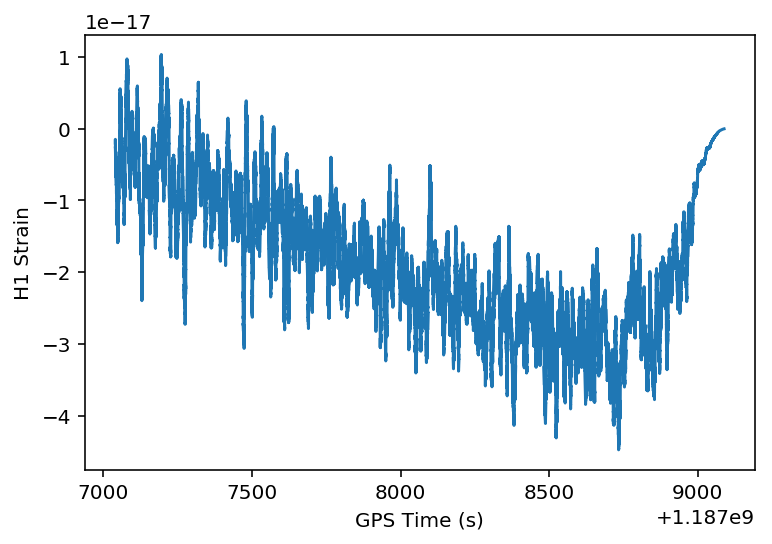

In [7]:
# Plot the time series
#----------------------
plt.plot(time, strain)
plt.xlabel('GPS Time (s)')
plt.ylabel('H1 Strain')
plt.show()

## Examine Data Quality

to search for transient gravitational wave sources, such as supernovae or compact object mergers, keep track of the DATA category and all BURST categories.

In [8]:
# display names of data quality flag bits
dqInfo = dataFile['quality']['simple']
bitnameList = dqInfo['DQShortnames'].value
nbits = len(bitnameList)

for bit in range(nbits):
    print(bit, bitnameList[bit])

0 b'DATA'
1 b'CBC_CAT1'
2 b'CBC_CAT2'
3 b'CBC_CAT3'
4 b'BURST_CAT1'
5 b'BURST_CAT2'
6 b'BURST_CAT3'


In [9]:
qmask = dqInfo['DQmask'].value
sci = (qmask >> 0) & 1
burst1  = (qmask >> 9) & 1
goodData_1hz = sci & burst1


Text(0.5,0,'Time (s)')

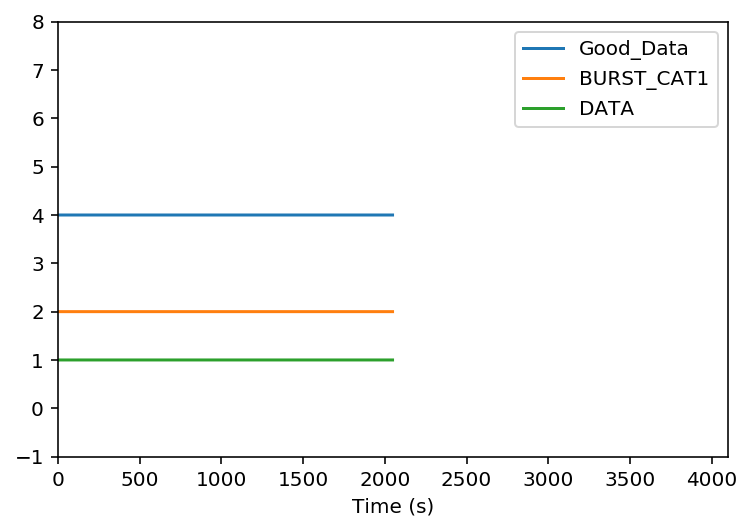

In [10]:
# This plot shows that all the data points in our sample have acceptable quality
plt.plot(goodData_1hz + 4, label='Good_Data')
plt.plot(burst1 + 2, label='BURST_CAT1')
plt.plot(sci, label='DATA')
plt.axis([0, 4096, -1, 8])
plt.legend(loc=1)
plt.xlabel('Time (s)')

In [11]:
import scipy.signal as sig

In [12]:
# apply 4th order Butterworth bandpass filter
fs = 4096
(B,A) = sig.butter(4, [80/(fs/2.0), 250/(fs/2.0)], btype='pass')
data_pass = sig.lfilter(B, A, strain)



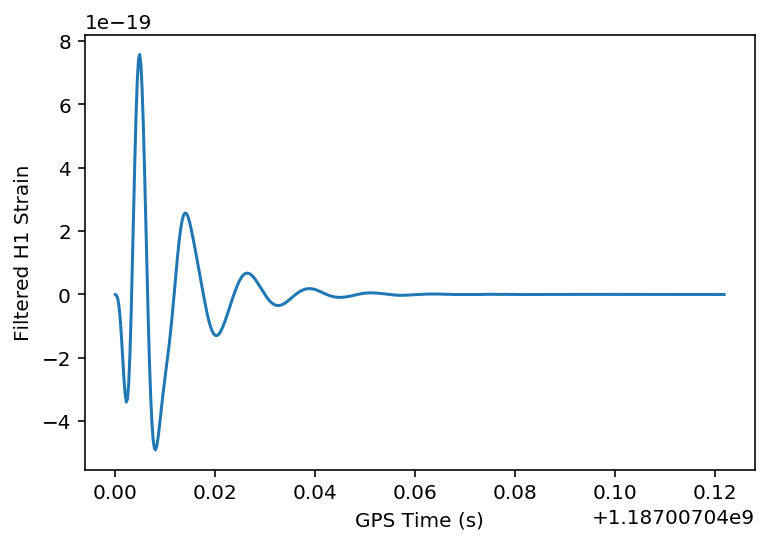

In [13]:
# Plot the time series after bandpass filtering
#----------------------------------------------
numSamples = 500
plt.plot(time[0:numSamples], data_pass[0:numSamples])
#plt.plot(time, data_pass)
plt.xlabel('GPS Time (s)')
plt.ylabel('Filtered H1 Strain')
plt.show()